In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
hr_data = pd.read_excel("HR_Employee_Data.xlsx")

In [11]:
hr_data.head(10)

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low
5,IND08609,0.41,0.50,2,153,3,0,1,0,sales,low
6,IND14345,0.10,0.77,6,247,4,0,1,0,sales,low
7,IND16300,0.92,0.85,5,259,5,0,1,0,sales,low
8,IND27336,0.89,1.00,5,224,5,0,1,0,sales,low
9,IND41409,0.42,0.53,2,142,3,0,1,0,sales,low


<Figure size 1000x600 with 0 Axes>

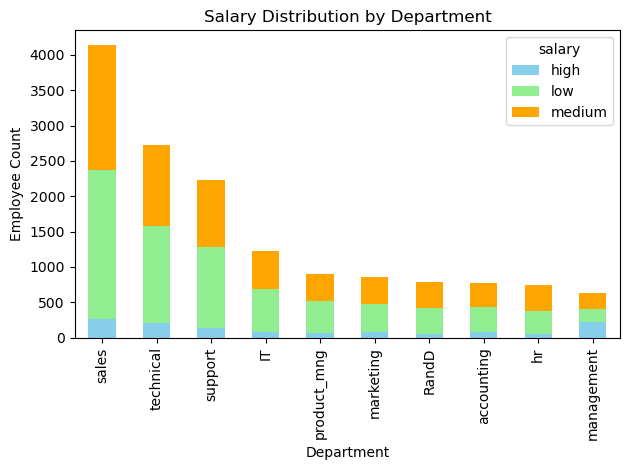

In [15]:
dept_salary = hr_data.groupby(['Department', 'salary']).size().unstack(fill_value=0)

dept_salary = dept_salary.loc[dept_salary.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(10, 6))
dept_salary.plot(
    kind='bar', 
    stacked=True, 
    color=['skyblue', 'lightgreen', 'orange'],
    title='Salary Distribution by Department'
)
plt.ylabel('Employee Count')
plt.tight_layout()
plt.show()

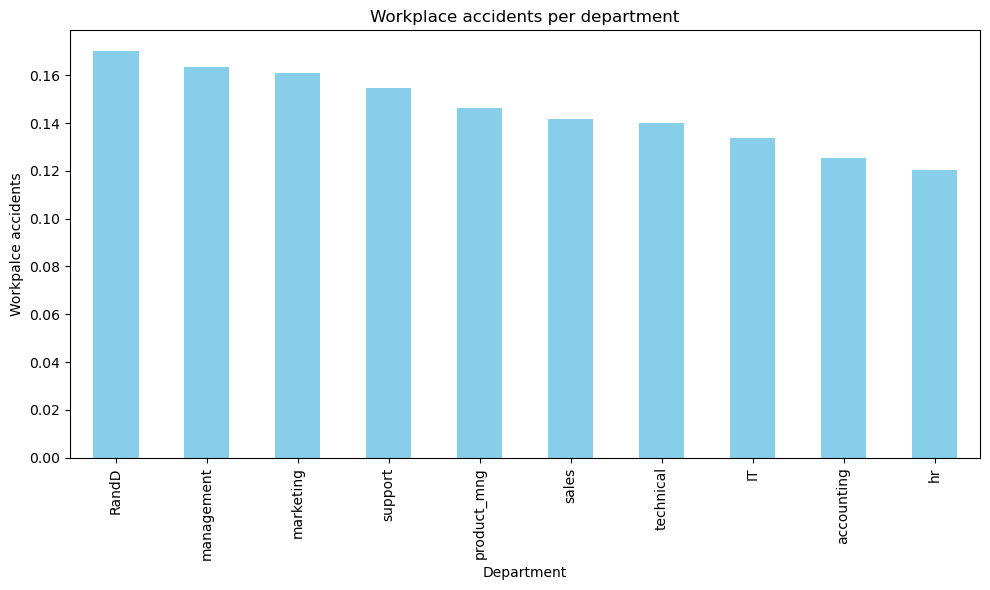

In [12]:
accidents_department = hr_data.groupby('Department')['Work_accident'].mean().sort_values(ascending=False)

ax = accidents_department.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Workplace accidents per department')

plt.ylabel('Workpalce accidents')
plt.tight_layout()
plt.show()

# Turnover rate by department

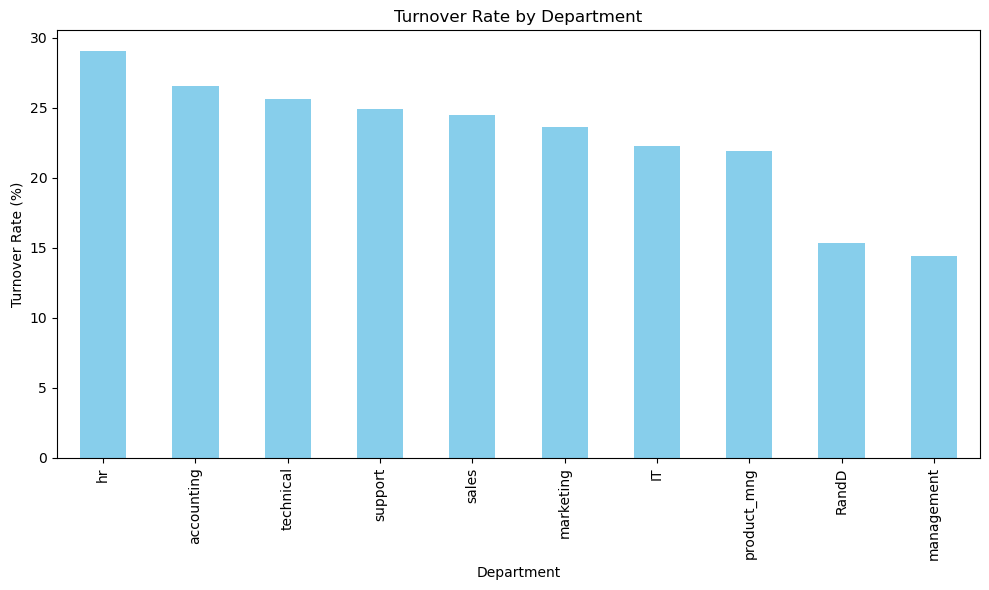

In [16]:
turnover_rate = hr_data[hr_data['left'] == 1].groupby('Department').size() / hr_data.groupby('Department').size() * 100

ax = turnover_rate.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='skyblue', title='Turnover Rate by Department')

plt.ylabel('Turnover Rate (%)')
plt.tight_layout()
plt.show()